# **Trading Stratgeies: Kernel Density Estimator (KDE) Moving Average**

Imports

In [ ]:
# import
import yfinance as yf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## **Indictor Algorithm**

We have all heard of moving averages and they are old news, instead we can levergae the ability of guassian smoothing functions.

Moving averages (not to be confused with MA models in time series forcasting) specifically in the simple case are not robust as they are supsebtable to outliers, this is becuase they depend on the mean calculation which is an unbiased estimator that has brakedown point of 0, meaning it only takes a signle data point to skew the estimate.

The kernel smoothing function is a non-paramatric statisticsal technique used to estimate some real valuesd function $f: \mathbb{R}^p \rightarrow \mathbb{R}$ at some point $X_0$, where the estimate is a the weighted average of neigboring observed data. The $p$ dimentional input here is time and $\hat{f}(X_0)$ is a continuous function of $x$ and $X_0 \in \mathbb{R} $.

The weights here are defined by some kernel function which assigns weights to closer neigboring points, an example of such a function is the Guassian or Epanechnikov kernel.

### KDE Derivation

Our kernel smoothing function is formally the Nadaraya-Watson Regression Estimator and is denoted as some real valued function $\hat{f}(X_0)$ where  

$\hat{f}(X = x_0) = \frac{\sum_{i=1}^{N} K(u)\,y_i}{\sum_{i=1}^{N} K(u)}$  

where

$u = \frac{x_0 - x_i}{h}$

$K(u) = \frac{1}{\sqrt{2\pi}}{e^{\frac{-u^2}{2}}}$

Nadarays-Watson Estimator Derivation [1]:

$$
\begin{align}
f(X) &= E[Y \mid X = x] \nonumber\\
&= \int y\, f_{Y \mid X}(y | x)dy \nonumber \\
&= \frac{\int y\, f_{X, Y}(x, y)dy}{f_X(x)}
\tag{1}
\end{align}
$$

Here $f(X)$ is the true regression estimator defined as the expectation of Y over all X. Using the definition of conditional expectation of continuous random variables this is indentical to the integral of the product of $y$ and $f_{Y \mid X}(y)$ with respect to y. We can re-write this equality again noting that the above is equal to the joint denisty of $x$ and $y$ over the marginal denisty of $x$.

To obtain the estimator $\hat{f}(X_0)$ we need to replance denisties with their correspsonding kernel desnity estimates (KDE's). To compute this we need definitions of univariate and multivarite KDE's

KDE's...
* multivariate case:
$$
\hat{f}(\textbf{X}; H) = \frac{1}{n} \sum_{i=1}^{n}K_{h_1}(x_{0,1} - x_{i,1}) \times ... \times K_{h_p}(x_{0,p} - x_{i,p})
$$
* univarite case: 
$$
\begin{equation}
\hat{f}(X = x_0; h) = \frac{1}{n} \sum_{i=1}^{n}K_{h}(x_0 - x_i)
\tag{2}
\end{equation}
$$

Where $\textbf{X} = (X_1 = x_{0,1},..., X_p = x_{0,p})$ is the feature vector for which we evaluate our respsone $y$ at and $H = (h_1,..., h_p)$ is the coressponding bandwidth for each feature. Also note that $K_{h_k} = \frac{1}{h_k} K(\frac{x_{0,i} - x_{i,p}}{h_k})$.

The kernel desnity estimate for the joint pdf is the bivariate case of the multivariate KDE defintion above. In the bivariate case we let $\textbf{X} = (X = x_0, Y = y_0)$ and $H = (h_1, h_2)$ which yields

\begin{equation}
\hat{f}(x, y; H) = \frac{1}{n} \sum_{i=1}^{n}K_{h_1}(x_0 - x_i)K_{h_2}(y_0 - y_i)
\tag{3}
\end{equation}

The KDE for the marginal density is identical to KDE in the univariate case, we just replace the bandwidth $h$ with the same bandwidth $h_1$ from above.   

Now we have enough infromation to calculate the KDE estimate of the regression function in $(1)$. Substituting $(2)$ and $(3)$ for the marginal and joint densaties respectivley

\begin{align}
f(X) &= \frac{\int y\, f_{X, Y}(x, y)}{f_X(x)} \nonumber \\
&= \frac{\int y \hat{f}(x, y; H)}{\hat{f}_X(x)} \nonumber \\
&= \frac{\int y \frac{1}{n} \sum_{i=1}^{n}K_{h_1}(x_0 - x_i)K_{h_2}(y_0 - y_i)}{\frac{1}{n} \sum_{i=1}^{n}K_{h_1}(x_0 - x_i)} \nonumber \\
&= \frac{\frac{1}{n} \sum_{i=1}^{n}K_{h_1}(x_0 - x_i) \int y K_{h_2}(y_0 - y_i)}{\frac{1}{n} \sum_{i=1}^{n}K_{h_1}(x_0 - x_i)} \nonumber \\
. \nonumber \\
. \nonumber \\
. \nonumber \\
&= \frac{\sum_{i=1}^{n}K_{h_1}(x_0 - x_i)Y_i}{\sum_{i=1}^{n}K_{h_1}(x_0 - x_i)} \nonumber
\end{align}

*To see the evaluation of the integral see Appendix.*






## **Trading Strategy**

Indicator algorthim, strategy backtest and backtest statistics   

In [ ]:
def gaussian_kernel(u):
    """
    Gaussian kernel function.

    Inputs --------------------------------------
    - u (float): The input to the kernel.

    Outputs --------------------------------------
    - ku (float): The computed kernel weights.
    """
    ku = (1 / np.sqrt(2 * np.pi)) * np.exp(-(u**2) / 2)

    return ku

def kde_point_estimate(prices, window, h):
    """
    kernel Denisty Estimator.

    Inputs --------------------------------------
    - prices (float): The input to the kernel.
    - window (float): The input to the kernel.
    - h (float): The input to the kernel.

    Outputs --------------------------------------
    - kde (float): The computed kernel weights.
    """
    num, denom = 0, 0
    mid = math.floor(window / 2)
    for i in range(0 ,window):
      u = (mid - i) / h
      num += gaussian_kernel(u) * prices[i]
      denom += gaussian_kernel(u)

    kde = num / denom

    return kde

def kde_moving_average(prices, window, h):
    """
    Computes the KDE based moving average for price data.

    Inputs --------------------------------------
    - prices (pd.Series): The input price data as a Pandas Series.
    - window (int, optional): The fixed rolling window size. Default is 5.
    - h (float): The bandwidth (smoothing parameter) for the kernel.

    Outputs --------------------------------------
    - pd.DataFrame: The smoothed prices as a Pandas DataFrame (2D).
    """

    kde_ma = prices.rolling(window = window).apply(
        lambda x: kde_point_estimate(x.values, window, h)
        )

    kde_ma = kde_ma.fillna(np.nan)

    return kde_ma

def kde_strategy(ticker, window, bandwidth, start_date, end_date):
    """
    Implements a trading strategy based on kernel smoothing.

    Inputs --------------------------------------
    - ticker (string): stock symbol.
    - window (int): bandwidth for kernel smoothing.
    - bandwidth (float): bandwidth for kernel smoothing.
    - start_date (string): start date for data.
    - end_date (string): end date for data.

    Outputs --------------------------------------
    - data (pd.DataFrame): strategy results and calculations
    - ror (float): final strategy return
    - sharpe (float): Sharpe ratio of the strategy
    - alpha (float): The
    """
    # Get data
    data = yf.download(ticker, start=start_date, end=end_date)
    # Invoke kernel smoothing calculation
    kde = kde_moving_average(data["Close"], window, bandwidth)
    # normalise
    data  = pd.concat([data['Close'], kde], axis = 'columns') # same as axis=1
    data.columns = ['Close', 'KDE']
    # Calculate simple returns
    data["Returns"] = data["Close"].pct_change()
    # Create strategy logic
    data["Position"] = np.nan
    # buy condition
    data["Position"] = np.where(data['Close'] > data['KDE'], 1, np.nan)
    # exit buy condition, we set truth statement to 0 to signal end of the exit
    data["Position"] = np.where(data['Close'] < data['KDE'], 0, data["Position"])
    # Forward fill the positions to maintain exposure until exit
    data["Position"] = data["Position"].ffill().fillna(0)
    # Calculate strategy returns
    data["Strategy_Returns"] = data["Position"].shift(1) * data["Returns"]
    # Calculate equity curve (cumulative returns)
    data["Equity_Curve"] = (data["Strategy_Returns"] + 1).cumprod() - 1
    data["Returns Adjsuted: min"] = np.where(data["Strategy_Returns"] == 0,
                                        data["Strategy_Returns"], data["Strategy_Returns"] - 0.0001)
    data["Returns Adjsuted: max"] = np.where(data["Strategy_Returns"] == 0,
                                        data["Strategy_Returns"], data["Strategy_Returns"] - 0.001)
    data["Equity_Curve: Commission min"] = (data["Returns Adjsuted: min"] + 1).cumprod() - 1
    data["Equity_Curve: Commission max"] = (data["Returns Adjsuted: max"] + 1).cumprod() - 1
    data["Equity_Curve: BASELINE"] = (data["Returns"] + 1).cumprod() - 1
    # Drop NaN values
    data = data.dropna()
    # Final Return on Investment (RoR) and Sharpe Ratio
    ror = data["Equity_Curve"].iloc[-1]
    alpha = data["Equity_Curve"].iloc[-1] - data["Equity_Curve: BASELINE"].iloc[-1]
    sharpe = (data["Strategy_Returns"].mean() / data["Strategy_Returns"].std()) * np.sqrt(252)

    return data, ror, sharpe, alpha

In [ ]:
# call function
ticker = "AAPL"
data, ror, sharpe, alpha = kde_strategy(ticker, 30, 10, "2018-01-01", "2023-12-31")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


final return in %terms, sharpe ratio and the return premiume


In [ ]:
print(ror*100)
print(sharpe)
print(alpha*100)

381.8993907024891
1.4014884973349768
9.118358345749922


position evaluation

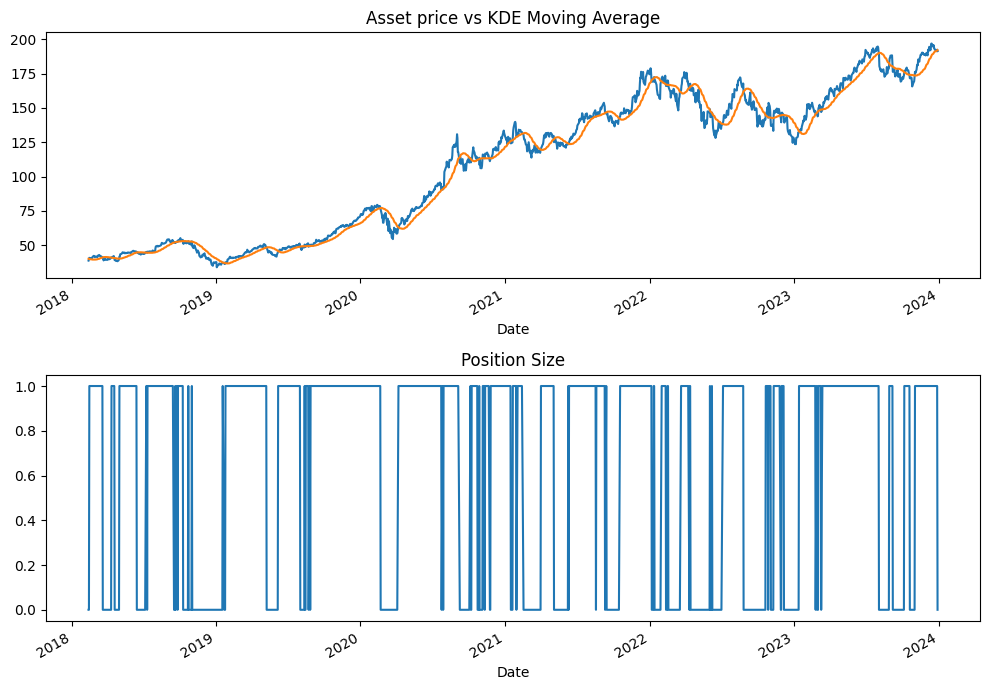

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 7))
data['Close'].plot(ax = ax[0])
data['KDE'].plot(ax = ax[0])
data['Position'].plot(ax = ax[1])
ax[0].set_title("Asset price vs KDE Moving Average")
ax[1].set_title("Position Size")
fig.tight_layout()

In [ ]:
# count unique position types (buy or neutral)
print(data['Position'].value_counts()) # genral code to count unique entries

# get bars with position and bars without
holding_pos = data.loc[data['Position'] == 1, "Position"]
neutral_pos = data.loc[data['Position'] == 0.0, "Position"]
print('\n', holding_pos, neutral_pos)

# fraction of days holding a position in the market to total days, the probability that we will be invested in the market
no_trds = data['Position'].value_counts().iloc[0]
fraction_trade_days = no_trds / len(data["Position"])
print('\n', fraction_trade_days)

Position
1.0    965
0.0    515
Name: count, dtype: int64

 Date
2018-02-15    1.0
2018-02-16    1.0
2018-02-20    1.0
2018-02-21    1.0
2018-02-22    1.0
             ... 
2023-12-21    1.0
2023-12-22    1.0
2023-12-26    1.0
2023-12-27    1.0
2023-12-28    1.0
Name: Position, Length: 965, dtype: float64 Date
2018-02-13    0.0
2018-02-14    0.0
2018-03-21    0.0
2018-03-22    0.0
2018-03-23    0.0
             ... 
2023-10-27    0.0
2023-10-30    0.0
2023-10-31    0.0
2023-11-01    0.0
2023-12-29    0.0
Name: Position, Length: 515, dtype: float64

 0.652027027027027


Equity curve plots (we re-invest all profits)

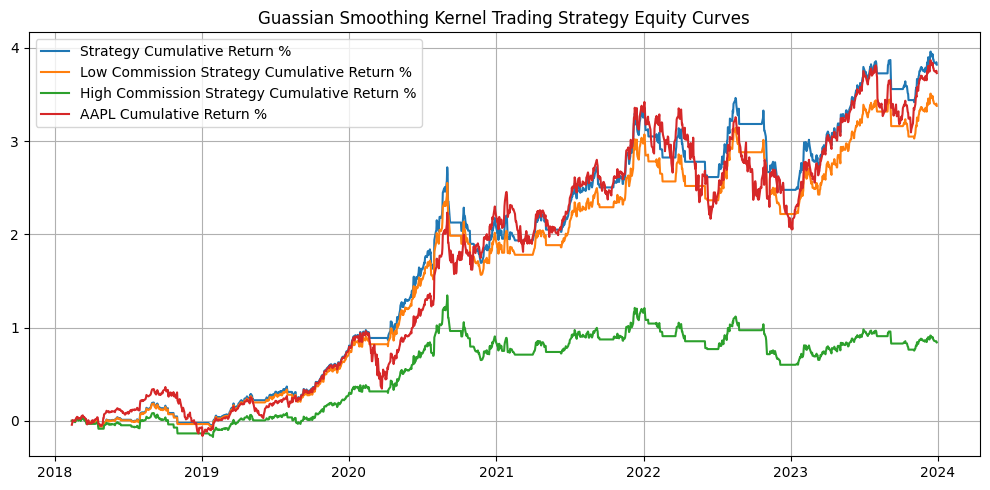

In [ ]:
fig = plt.subplots(figsize=(10, 5))
plt.plot(data['Equity_Curve'], label = "Strategy Cumulative Return %")
plt.plot(data['Equity_Curve: Commission min'], label = "Low Commission Strategy Cumulative Return %")
plt.plot(data['Equity_Curve: Commission max'], label = "High Commission Strategy Cumulative Return %")
plt.plot(data['Equity_Curve: BASELINE'], label = f"{ticker} Cumulative Return %")
plt.title("Guassian Smoothing Kernel Trading Strategy Equity Curves")
plt.grid(True)
plt.legend()
plt.tight_layout()

The strategy is heavily correlated to the basline, notebelly best performing in times where the basline is trading negatively with high momentum or volatiity (2020, 2022)

#**Strategy Robustness: Cross Asset Performance**

Code runs strategy on multiple assets holding all startegy variables fixed. Note that we implement grid search algorithms for all our optimsation algorithms.

In [ ]:
def MultiAssetFixedParam(tickers: list):
  errors = {}
  # Create an empty dictionary to store RORs
  ticker_ror = {}
  ticker_sharpe = {}
  # Run the strategy for each RSI lag and store ROR
  for tick in tickers:
    try:
      _, _, sharpe, alpha = kde_strategy(tick, 30, 10, "2018-01-01", "2023-12-31")
      ticker_ror[tick] = alpha
      ticker_sharpe[tick] = sharpe
    except Exception as e:
      print(f"Erros: {e}")
      ticker_ror[tick] = 0
      ticker_sharpe[tick] = 0
  ticker_ror = pd.Series(ticker_ror)
  ticker_sharpe = pd.Series(ticker_sharpe)
  return ticker_ror, ticker_sharpe

Plots a heatmap of the alpha of the strategy across the many asset classes holding the hyperparameters constant

In [ ]:
# Convert ror_data to a DataFrame for heatmap
def MultiAssetFixedParamHeatmap(tickerROR: np.ndarray, tickers: str, color: str, title: str, bar: str):
  df_ticker_ror = pd.DataFrame(tickerROR, columns=['ROR'], index=tickerROR.index)
  # Generate heatmap (replace with your preferred heatmap library)
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.heatmap(
      df_ticker_ror,
      cmap=color,
      annot=True,  # Show the values on the heatmap
      fmt=".2f",   # Format for annotation values
      linewidths=0.5,
      linecolor='white',
      cbar_kws={'label': bar}  # Add a label to the color bar
  )
  # Add labels and title
  plt.xticks([])
  ax.set_yticks(np.arange(len(df_ticker_ror)))
  ax.set_yticklabels(tickers)
  plt.title(title)
  # Add colorbar
  plt.tight_layout()
  plt.show()

In [ ]:
assets = [
    # Technology (8 assets)
    {'Ticker': 'AAPL', 'Asset Class': 'Technology'},
    {'Ticker': 'MSFT', 'Asset Class': 'Technology'},
    {'Ticker': 'NVDA', 'Asset Class': 'Technology'},
    {'Ticker': 'CSCO', 'Asset Class': 'Technology'},
    {'Ticker': 'INTC', 'Asset Class': 'Technology'},
    {'Ticker': 'ADBE', 'Asset Class': 'Technology'},
    {'Ticker': 'ORCL', 'Asset Class': 'Technology'},
    {'Ticker': 'IBM', 'Asset Class': 'Technology'},

    # Consumer Discretionary (9 assets)
    {'Ticker': 'AMZN', 'Asset Class': 'Consumer Discretionary'},
    {'Ticker': 'TSLA', 'Asset Class': 'Consumer Discretionary'},
    {'Ticker': 'BABA', 'Asset Class': 'Consumer Discretionary'},
    {'Ticker': 'HD', 'Asset Class': 'Consumer Discretionary'},
    {'Ticker': 'MCD', 'Asset Class': 'Consumer Discretionary'},
    {'Ticker': 'NKE', 'Asset Class': 'Consumer Discretionary'},
    {'Ticker': 'SBUX', 'Asset Class': 'Consumer Discretionary'},
    {'Ticker': 'DIS', 'Asset Class': 'Consumer Discretionary'},
    {'Ticker': 'LOW', 'Asset Class': 'Consumer Discretionary'},

    # Financials (9 assets)
    {'Ticker': 'BRK.B', 'Asset Class': 'Financials'},
    {'Ticker': 'JPM', 'Asset Class': 'Financials'},
    {'Ticker': 'V', 'Asset Class': 'Financials'},
    {'Ticker': 'MA', 'Asset Class': 'Financials'},
    {'Ticker': 'GS', 'Asset Class': 'Financials'},
    {'Ticker': 'MS', 'Asset Class': 'Financials'},
    {'Ticker': 'BAC', 'Asset Class': 'Financials'},
    {'Ticker': 'C', 'Asset Class': 'Financials'},
    {'Ticker': 'WFC', 'Asset Class': 'Financials'}
]

sector_df = pd.DataFrame(assets)

[*********************100%***********************]  1 of 1 completed

['Technology' 'Technology' 'Technology' 'Technology' 'Technology'
 'Technology' 'Technology' 'Technology' 'Consumer Discretionary'
 'Consumer Discretionary' 'Consumer Discretionary'
 'Consumer Discretionary' 'Consumer Discretionary'
 'Consumer Discretionary' 'Consumer Discretionary'
 'Consumer Discretionary' 'Consumer Discretionary' 'Financials'
 'Financials' 'Financials' 'Financials' 'Financials' 'Financials'
 'Financials' 'Financials' 'Financials']



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

Erros: single positional indexer is out-of-bounds


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


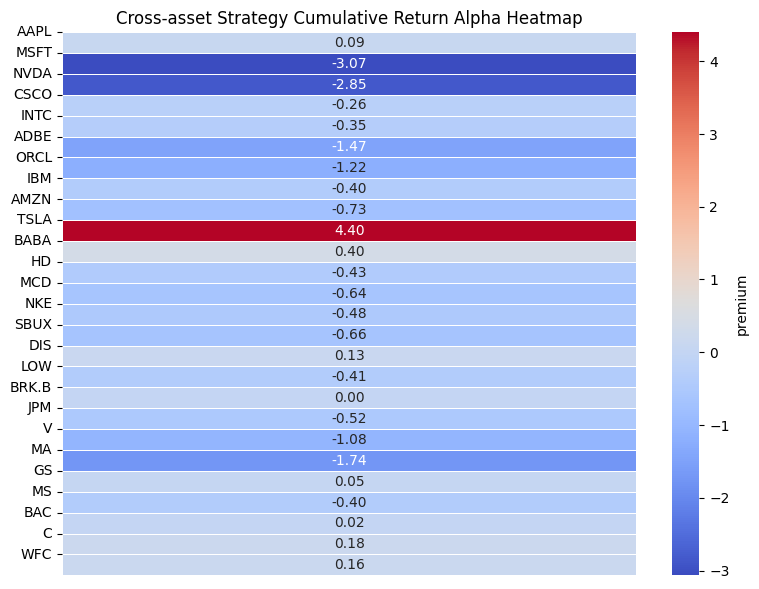

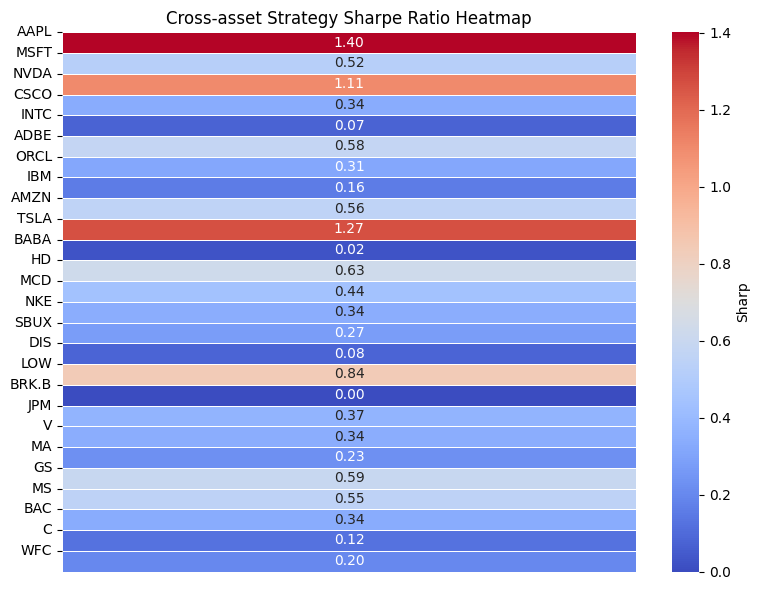

In [ ]:
%%capture
# random tickers (not sector specific)
ticklist = sector_df.get(key='Ticker').values
print(sector_df.iloc[:,1].values)

# call function
ticker_ror, ticker_sharpe = MultiAssetFixedParam(ticklist)

In [ ]:
# plot output
clr = 'coolwarm'
MultiAssetFixedParamHeatmap(ticker_ror, ticklist, clr, title = 'Cross-asset Strategy Cumulative Return Alpha Heatmap', bar = 'premium')
MultiAssetFixedParamHeatmap(ticker_sharpe, ticklist, clr, title = 'Cross-asset Strategy Sharpe Ratio Heatmap', bar = 'Sharp')

## **Hyperameter Optimization: 1 Way Grid Search**

Here we optimize the  strategy, more specifically we maxmaize the strategy return with respect to the window hyperparameter, holding the asset fixed.

fixed asset hyperparameter optimiztaion function

In [ ]:
def MultiHyperOptFixedAsset(lags: range, start_date, end_date):
  erros = {}
  # Create an empty dictionary to store RORs for each lag
  ror_data = {}
  sharpe_data = {}
  try:
    for lag in lags:
      # Run the strategy with current RSI lag
      _, _, sharpe, alpha = kde_strategy(ticker, lag, 10, start_date, end_date)
      ror_data[lag] = alpha
      sharpe_data[lag] = sharpe
  except Exception as e:
    erros[f"{lag}"] = e
  # Find the lag with the maximum ROR
  lag_max_ror = max(ror_data, key=ror_data.get) # df.get(key='column_name') returns column
  return ror_data, lag_max_ror, sharpe_data, erros

function plots a heatmap of strategy returns for multipple values of a hyperparameters for a fixed asset  

In [ ]:
def MultiHyperOptFixedAssetHeatmap(dataROR: dict, color: str, title: str, bar: str):
  # Convert ror_data to a DataFrame for heatmap
  df_ror = pd.DataFrame.from_dict(dataROR, orient='index', columns=['ROR'])
  # Generate heatmap (replace with your preferred heatmap library)
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.heatmap(
      df_ror,
      cmap=color,
      annot=True,  # Show the values on the heatmap
      fmt=".2f",   # Format for annotation values
      linewidths=0.5,
      linecolor='white',
      cbar_kws={'label': bar}  # Add a label to the color bar
  )
  # Add labels and title
  plt.xticks([])
  plt.yticks(range(len(df_ror)), df_ror.index.astype(int))  # Explicit conversion to int for clarity
  plt.ylabel('lags')
  plt.title(title)
  # Add colorbar
  plt.tight_layout()
  plt.show()

call fixed asset hyperparameter function and heatmap function

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

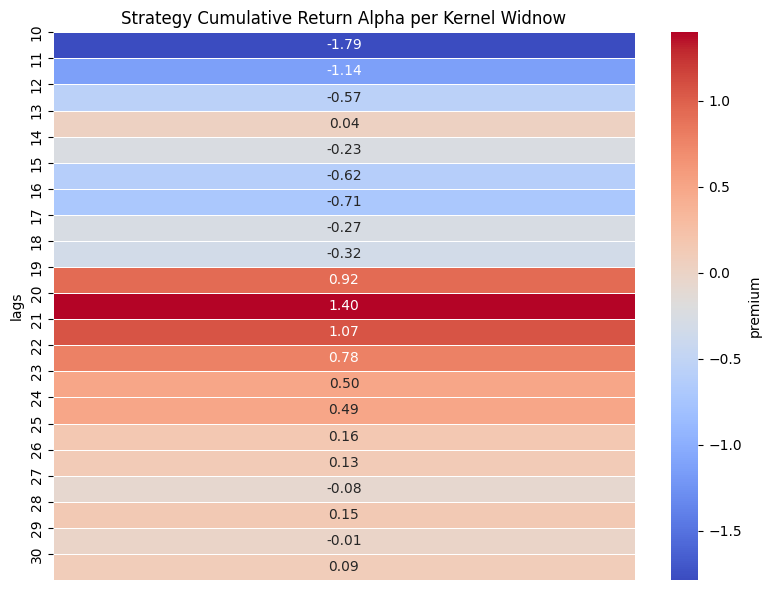

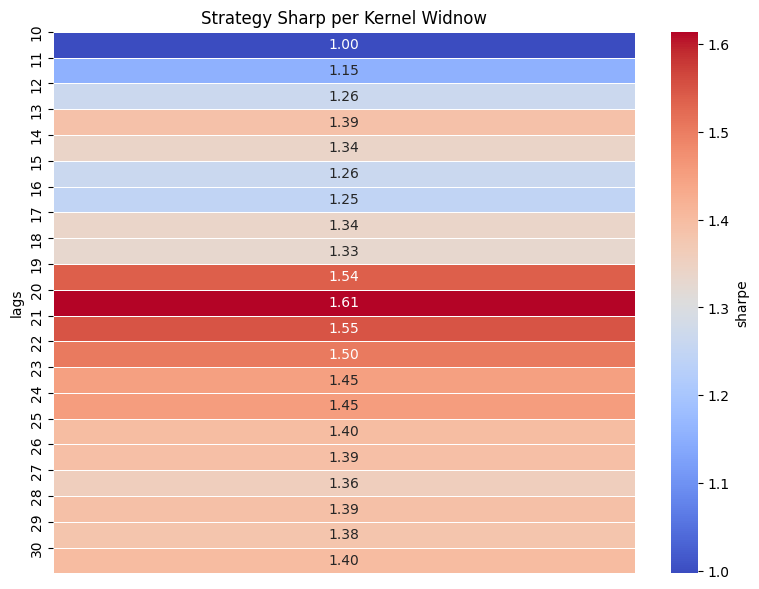

In [ ]:
%%capture
windows = range(10, 31)
alpha_data, lag_max_ror, sharpe_data, _ = MultiHyperOptFixedAsset(windows, "2018-01-01", "2023-12-31")

In [ ]:
MultiHyperOptFixedAssetHeatmap(alpha_data, clr, 'Strategy Cumulative Return Alpha per Kernel Widnow', 'premium')
MultiHyperOptFixedAssetHeatmap(sharpe_data, clr, 'Strategy Sharp per Kernel Widnow', 'sharpe')

call functions

## **Hyperperameter Optimization: 1 Way Grid Search and Cross Asset Performance**





Now we optimise asset and parameter wise.

In [ ]:
# Embeded dictionary
def lag_asset_vis(TickList, LagList, start_date, end_date):
  # Create an empty dictionary to store results
  res_tick_period = {}
  res_tick_sharpe = {}
  # Loop through each stock ticker
  for tick in TickList:
    try:
      # Create a dictionary to store RORs for this ticker with different RSI lags
      ticker_rors = {}
      ticker_sharps = {}
      for lag in LagList:
        _, _, sharpe, alpha = kde_strategy(tick, lag, 10, start_date, end_date)
        if data is not None:  # Check if data retrieval was successful, when None is false returns true
          ticker_rors[lag] = alpha
          ticker_sharps[lag] = sharpe
        else:
          ticker_rors[lag] = np.nan  # Assign NaN for missing data
          ticker_sharps[lag] = np.nan
      # Add the dictionary of RORs for this ticker to the results
      res_tick_period[tick] = ticker_rors
      res_tick_sharpe[tick] = ticker_sharps
    except Exception as e:
      print(f"Error fetching data for: {tick}", e)
  return res_tick_period, res_tick_sharpe

Here we use the seabord module to represent the multi-asset hyperparameter grid search optimisation as a hierarchically-clustered heatmap

In [ ]:
# we need to map sectors to colors
def MultiHyperOptAssetSnsHc(ticklagsROR: dict, color: str, title, bar):
  """
  cross asset strategy performance across windows, categorised by simularity
  """
  tickers = ticklagsROR.keys() # the ticks
  ticker_lags = ticklagsROR.values() # the ror values for all lags for each ticker, dict object

  # parses each dictionary in list to index which is ticker (number of indeces (index points) / tickers is equal to number of dictionaries)
  df_opt = pd.DataFrame(data = list(ticker_lags), index = tickers)
  df_opt_cpy = df_opt.copy()

  # add columns that represent industry of asset
  sector_data = sector_df.set_index('Ticker', inplace=False) # inplace=True modifies data directly
  sector_data.drop('BRK.B', inplace=True)
  df_opt['Industry'] = sector_data['Asset Class']
  unique_industries = df_opt['Industry'].unique()
  colors = sns.color_palette('Set3', len(unique_industries))
  lut = dict(zip(unique_industries, colors)) # for each unique entry assign a color
  row_colors = df_opt['Industry'].map(lut) # replace each industry name with its assigned color

  # create heirarchically clustered heatmap with dendogram and labels
  sns.clustermap(df_opt.iloc[:, :-1], figsize = (8, 7), cmap = color, cbar_pos=(1, 0.2, 0.03, 0.6), row_colors=row_colors, cbar_kws={'label': bar})
  plt.suptitle(title, y=1.02, ha='center')
  return df_opt_cpy

Grid search matrix

In [ ]:
%%capture
ick_lkb_ret, tick_lkb_sharp = lag_asset_vis(ticklist, windows, "2018-01-01", "2023-12-31")
# print('First 10 assets returns per lag \n', pd.Series(tick_lkb_ret).iloc[0:10])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Error fetching data for: BRK.B single positional indexer is out-of-bounds


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Optimisation with clustering for alpha

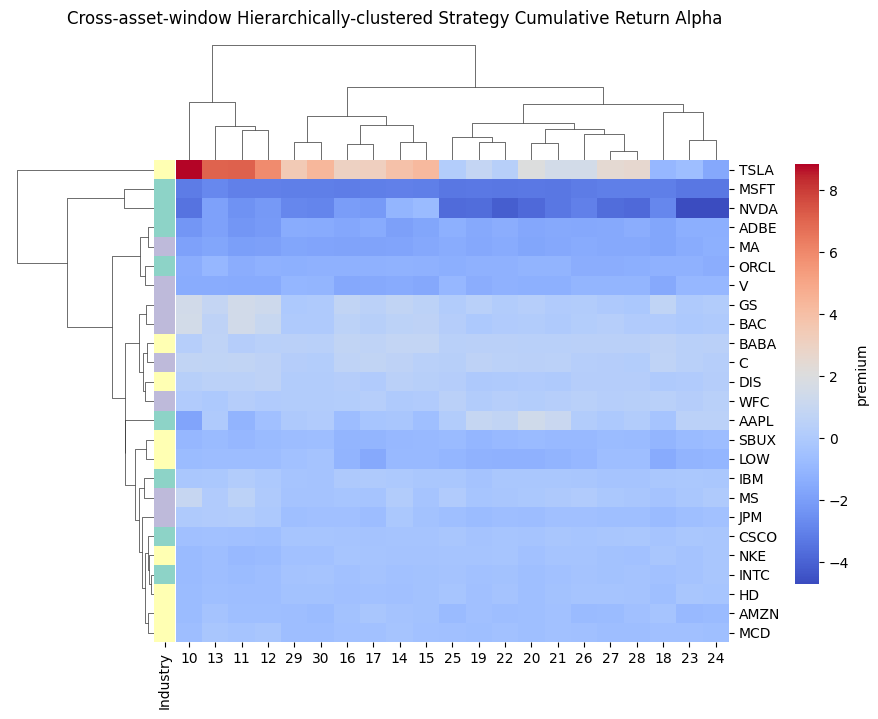

In [ ]:
clr = 'coolwarm'
df_opt_ret = MultiHyperOptAssetSnsHc(tick_lkb_ret, clr, title = 'Cross-asset-window Hierarchically-clustered Strategy Cumulative Return Alpha', bar = 'premium')

The hierarchically clustered heatmap groups similar labels. We observe that lower window thresholds are associated with higher returns. There however seems to be no industry specific trend. Identifying such a trend would suggest the "universe" of assets our strategy is best performing on. One such universe may exist, however the industry feature may not be the correct label to group by.

Optimisation with clustering for sharpe

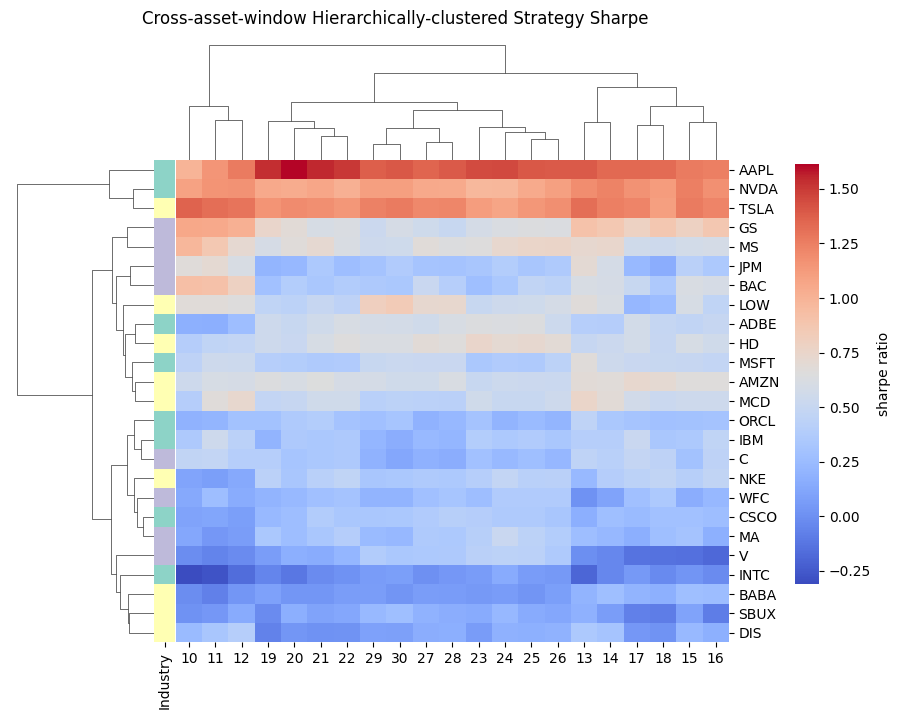

In [ ]:
df_opt_sharpe = MultiHyperOptAssetSnsHc(tick_lkb_sharp, clr, title = 'Cross-asset-window Hierarchically-clustered Strategy Sharpe', bar = 'sharpe ratio')

Similar to the "Cumulative Return Alpha" we see lower KDE moving average windows are generally associated with better risk adjusted performance. The interpretation of the industry label remains unchanged.

3D plot

In [ ]:
def MultiHyperOptAsset3D(TickerLagReturn: pd.DataFrame, title: str, y_axis: str):
  df_opt = TickerLagReturn.dropna()

  # z values
  Lags = list(df_opt.keys())
  df_lag = df_opt[Lags]
  ary = np.array(df_lag) # or ary = np.array(df_opt)

  # X (each intiger is an asset in our dataset), Y and Z components
  x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
  y = df_opt.columns
  X, Y = np.meshgrid(x, y)
  Z = ary

  # plot gloabl
  fig, ax = plt.subplots(2, 2, figsize = (20, 20), subplot_kw = {"projection": "3d"} )
  fig.suptitle(title, fontsize = 30)

  # x label values
  X_labels = sector_df["Ticker"][sector_df["Ticker"] != "BRK.B"].values

  # 3D plot
  surf3 = ax[0,0].plot_surface(X, Y, Z.T, cmap = cm.coolwarm, linewidth = 0) # named for colorbar
  ax[0,1].plot_surface(X, Y, Z.T, cmap = cm.coolwarm, linewidth = 0)
  ax[1,0].plot_surface(X, Y, Z.T, cmap = cm.coolwarm, linewidth = 0)
  ax[1,1].plot_surface(X, Y, Z.T, cmap = cm.coolwarm, linewidth = 0)

  # Customize plot elements
  # Set x-axis tick positions and labels for all subplots
  for a in ax.flat:
      a.set_xticks(x)
      a.set_xticklabels(X_labels, rotation=45, ha='right')
      a.set_xlabel('Tickers')
      a.set_ylabel('Windows')
      a.set_zlabel(y_axis)

  # Customize plot elements
  # plot 1
  ax[0,0].set_xlabel('Tickers')
  ax[0,0].set_ylabel('Windows')
  ax[0,0].set_zlabel(y_axis)
  # plot 2
  ax[0,1].set_xlabel('Tickers')
  ax[0,1].set_ylabel('Windows')
  ax[0,1].set_zlabel(y_axis)
  # plot 3
  ax[1,0].set_xlabel('Tickers')
  ax[1,0].set_ylabel('Windows')
  ax[1,0].set_zlabel(y_axis)
  # plot 4
  ax[1,1].set_xlabel('Tickers')
  ax[1,1].set_ylabel('Windows')
  ax[1,1].set_zlabel(y_axis)

  # Rotate the plot for better visualization (adjust angles if needed)
  ax[0,0].view_init(elev=30, azim=-60)  # Adjust elevation and azimuth
  ax[0,1].view_init(elev=40, azim=0)
  ax[1,0].view_init(elev=30, azim=60)
  ax[1,1].view_init(elev=10, azim=30)

  fig.colorbar(surf3, shrink = 0.7)

  fig.tight_layout()


<ipython-input-57-b8259108cc85>:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


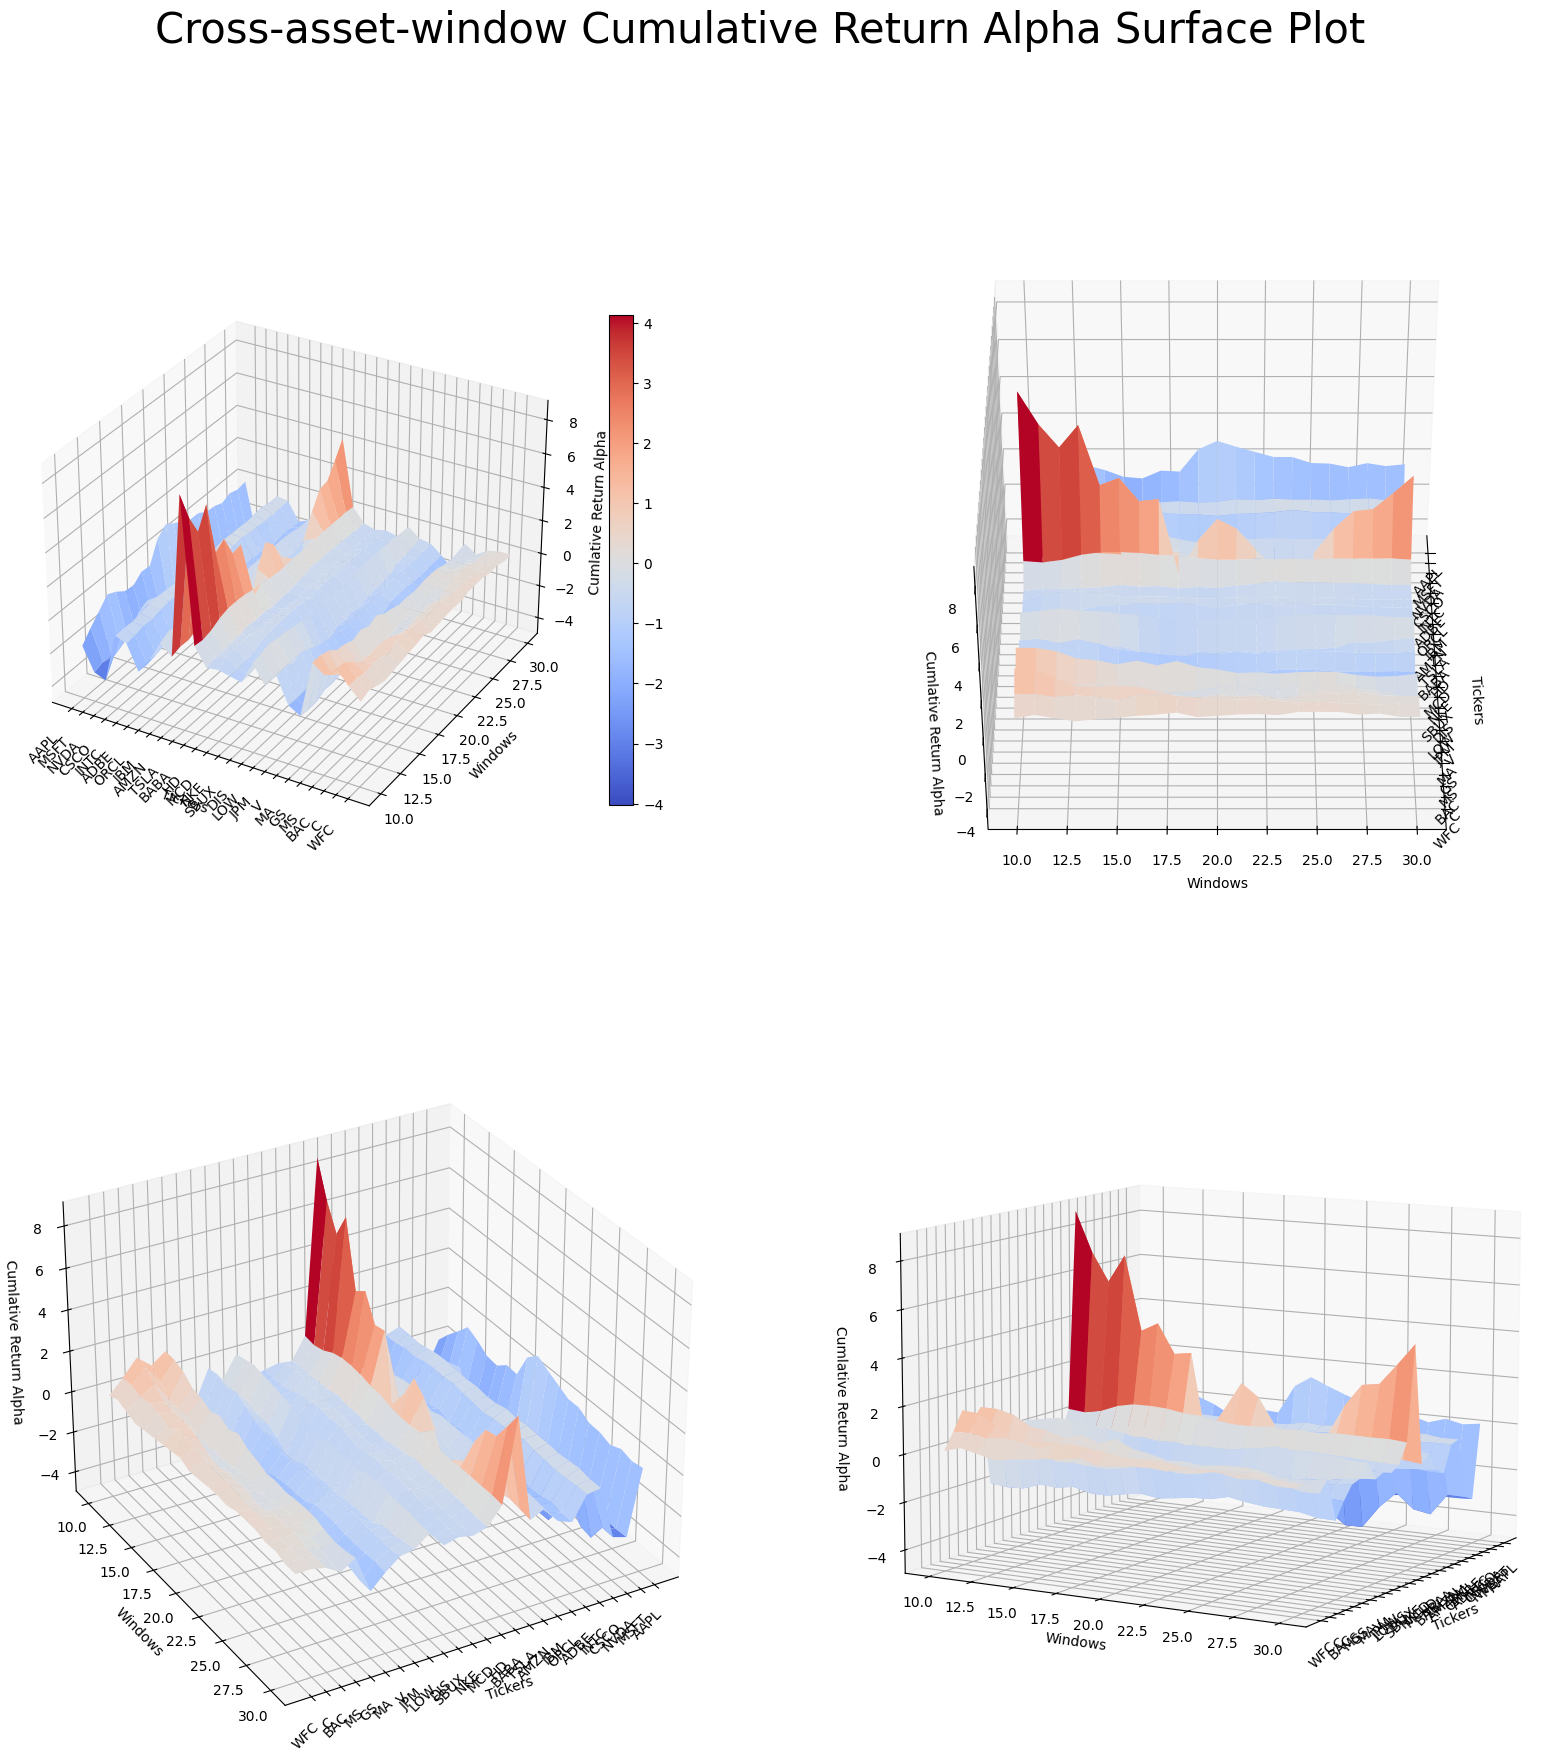

In [ ]:
MultiHyperOptAsset3D(df_opt_ret, "Cross-asset-window Cumulative Return Alpha Surface Plot",
                     y_axis = "Cumlative Return Alpha")

The strategies return (and return premium) is decreasing in the KDE rolling window.

<ipython-input-57-b8259108cc85>:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


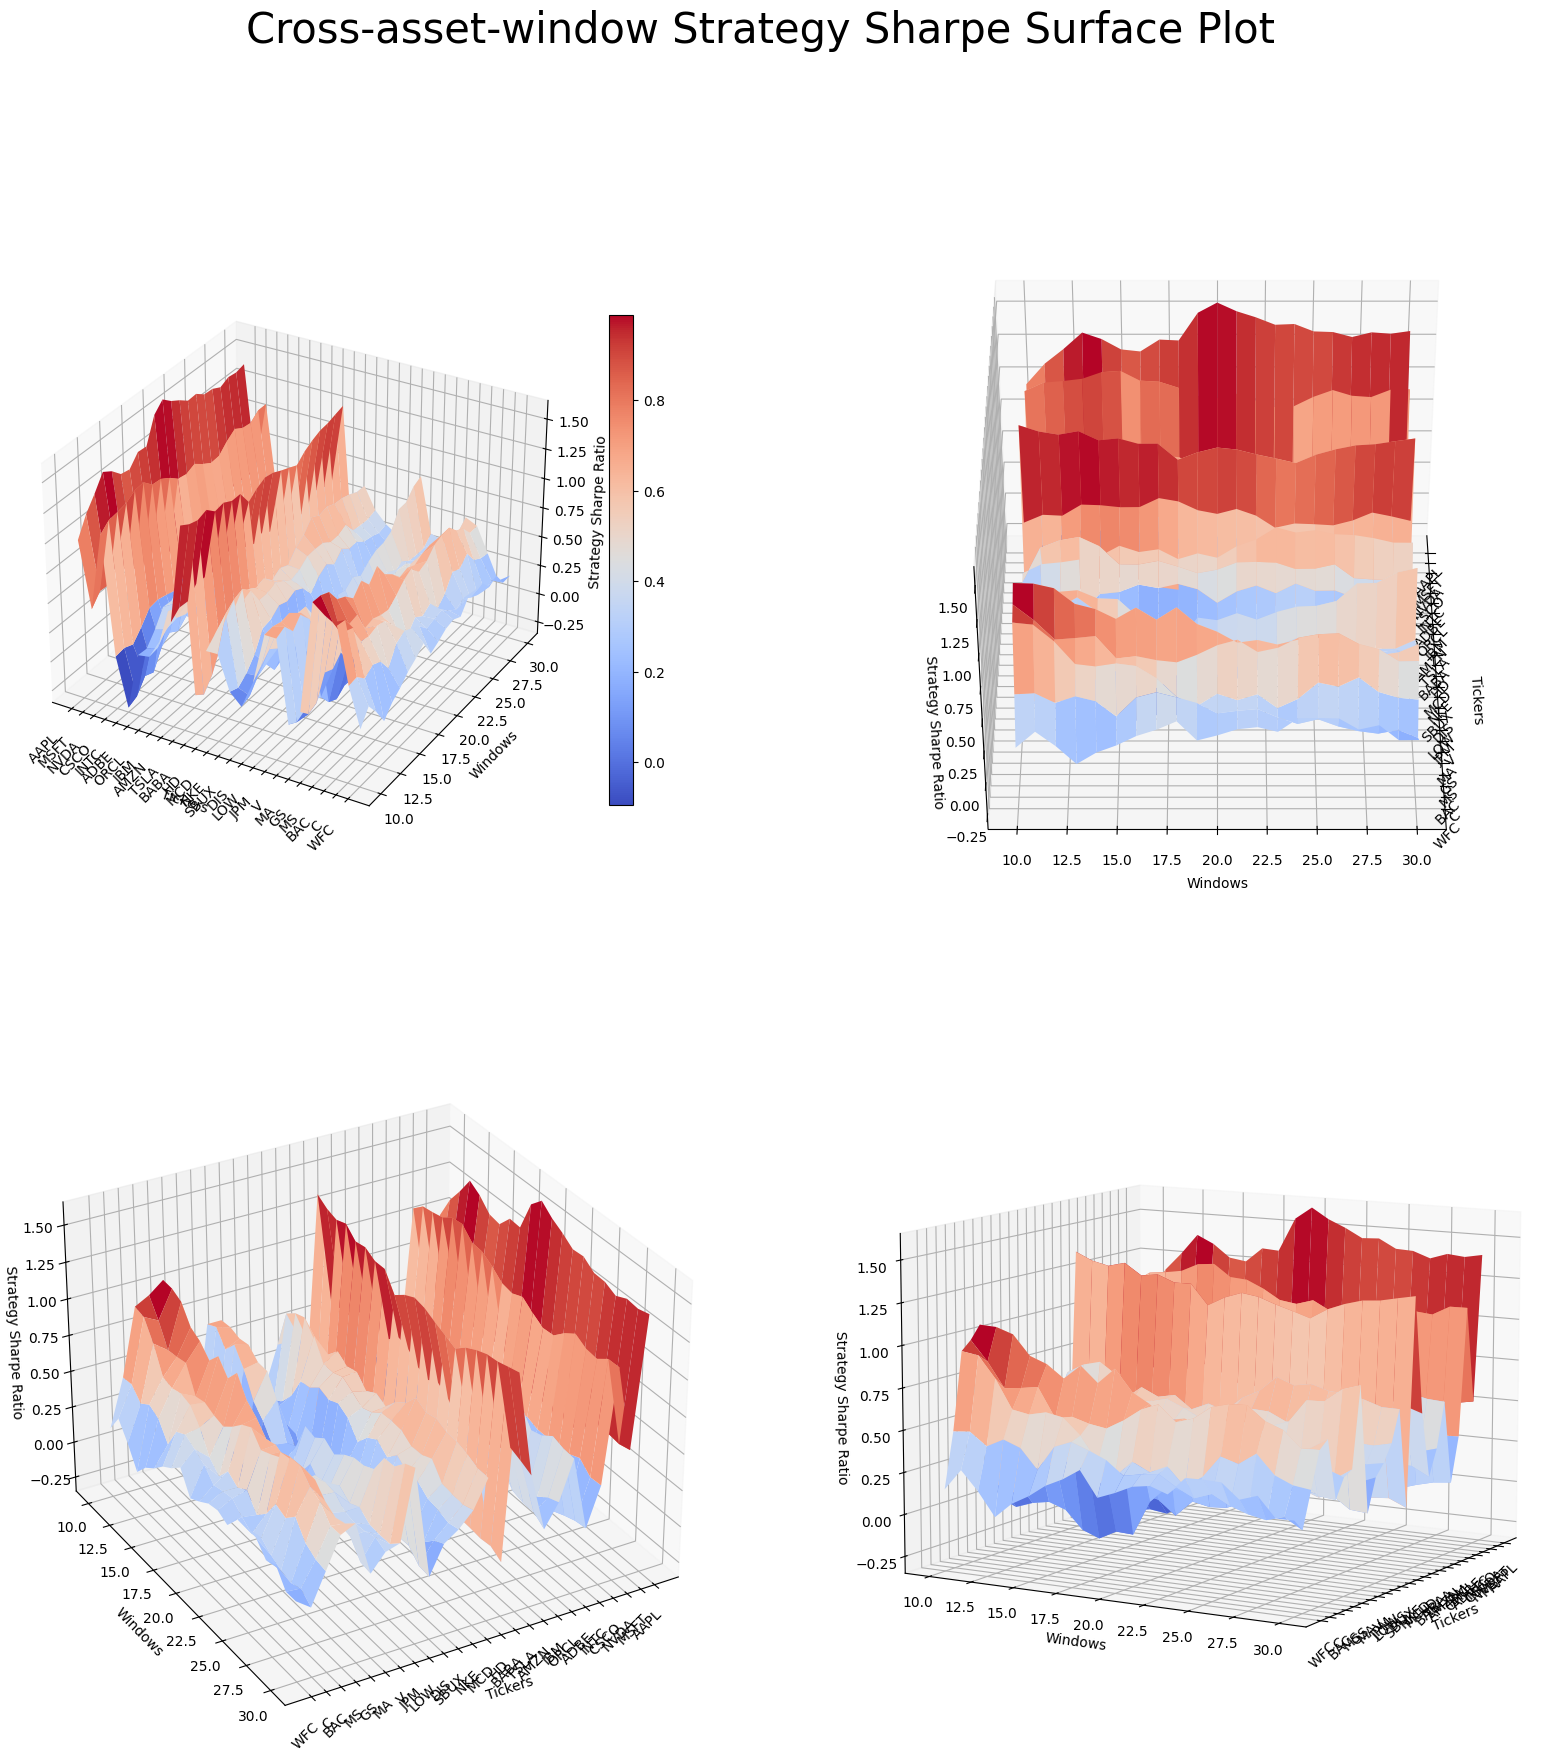

In [ ]:
MultiHyperOptAsset3D(df_opt_sharpe, "Cross-asset-window Strategy Sharpe Surface Plot", y_axis = "Strategy Sharpe Ratio")

Their is no clear relationship between bandwidth and strategy sharpe ratio across assets.

#**Walk Forward Analysis (WFA)**


For WFA (Walk Forward Analysis), we need to choose the number of folds and the fold technique. Will it be fixed walk forward or fixed rolling walk forward?

## Fixed WFA

Alternatively we could perform time series k fold cross validation. This is basically a fixed walk forward method where the number of folds is $n - 1$, with n being the number of observations for some given sampling period. e.g. If we have $6$ years of data (sampled monthly) then we would have $5$ folds ($6 - 1$) and we would increment the initial training set by the size of the test set (12 months) after we have optimised and tested for each period until $5$th $(n - 1st)$ fold.

## Fixed Rolling WFA

Here we opt for fixed rolling window WFA method, where for $n$ periods, a fixed rolling window size, $m$, and a test size of $1$ year, we have $n - m$ training and test sets or $n - m$ folds.


Let's take an example. E.g. For our $6$ years of data and assuming a step size of $1$ year and a rolling window of $2$ years we have $4$ folds ($6 - 2$)


The choice for fold technique is arbitrary but here we opt for the latter.



Foxed Rolling WFA implementation


In [ ]:
ticker = 'AAPL'
# Fold 1
train_start1, train_end1 = "2018-01-01", "2019-12-31"
test_start1, test_end1 = "2020-01-01", "2020-12-31"
train_data1, _, _, _ = kde_strategy(ticker, 30, 10, train_start1, train_end1)
_, lag_max_ror1, _, _ = MultiHyperOptFixedAsset(windows, train_start1, train_end1)
test_data1, _, _, _ = kde_strategy(ticker, lag_max_ror1, 10, test_start1, test_end1)
# Fold 2
train_start2, train_end2 = "2019-01-01", "2020-12-31"
test_start2, test_end2 = "2021-01-01", "2021-12-31"
train_data2, _, _, _ = kde_strategy(ticker, lag_max_ror1, 10, train_start2, train_end2)
_, lag_max_ror2, _, _ = MultiHyperOptFixedAsset(windows, train_start2, train_end2)
test_data2, _, _, _ = kde_strategy(ticker, lag_max_ror2, 10, test_start2, test_end2)
# Fold 3
train_start3, train_end3 = "2020-01-01", "2021-12-31"
test_start3, test_end3 = "2022-01-01", "2022-12-31"
train_data3, _, _, _ = kde_strategy(ticker, lag_max_ror2, 10, train_start3, train_end3)
_, lag_max_ror3, _, _ = MultiHyperOptFixedAsset(windows, train_start3, train_end3)
test_data3, _, _, _ = kde_strategy(ticker, lag_max_ror3, 10, test_start3, test_end3)
# Fold 4
train_start4, train_end4 = "2021-01-01", "2022-12-31"
test_start4, test_end4 = "2023-01-01", "2023-12-31"
train_data4, _, _, _ = kde_strategy(ticker, lag_max_ror3, 10, train_start4, train_end4)
_, lag_max_ror4, _, _ = MultiHyperOptFixedAsset(windows, train_start4, train_end4)
test_data4, _, _, _ = kde_strategy(ticker, lag_max_ror4, 10, test_start4, test_end4)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

lets visualise the number of observations per train set, this should be fairly consistet among all sets, variation arises due to trading holidays / leep years which result in some years having more trading days than other.

In [ ]:
print(train_data1.count(axis=0).values) # axis = 0 signifies row counts
print(train_data2.count(axis=0).values)
print(train_data3.count(axis=0).values)
print(train_data4.count(axis=0).values)

[473 473 473 473 473 473 473 473 473 473 473]
[483 483 483 483 483 483 483 483 483 483 483]
[486 486 486 486 486 486 486 486 486 486 486]
[484 484 484 484 484 484 484 484 484 484 484]


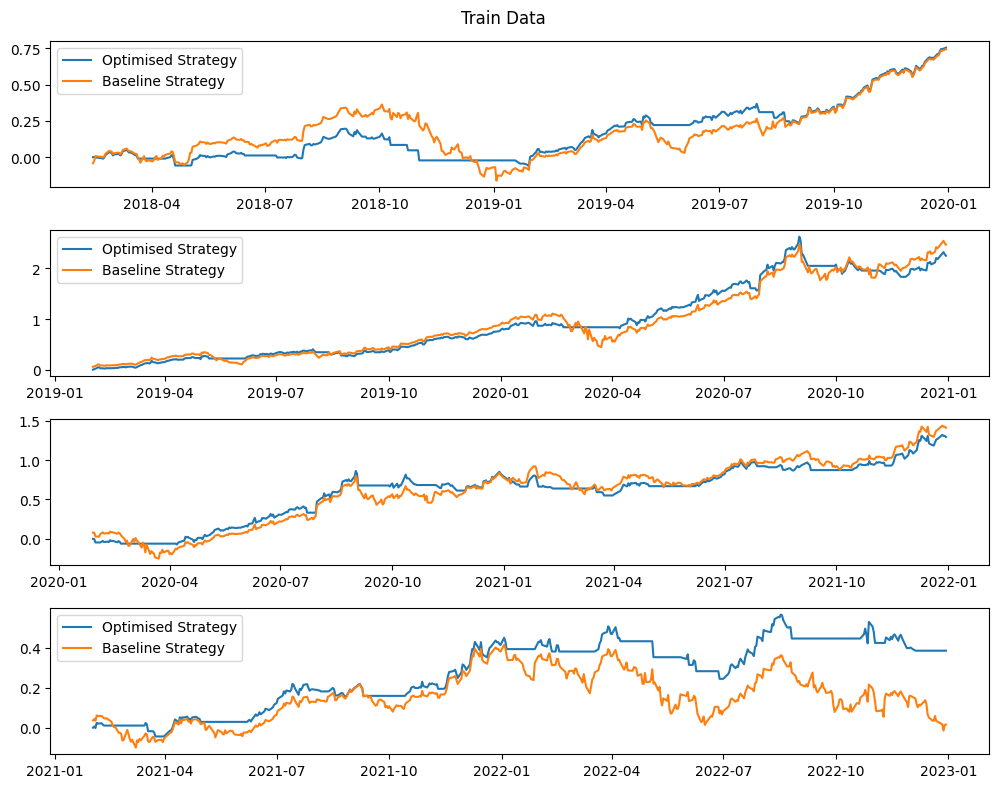

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
#  train plot 1
ax[0].plot(train_data1['Equity_Curve'])
ax[0].plot(train_data1['Equity_Curve: BASELINE'])
ax[0].legend(['Optimised Strategy', 'Baseline Strategy'])
#  train plot 2
ax[1].plot(train_data2['Equity_Curve'])
ax[1].plot(train_data2['Equity_Curve: BASELINE'])
ax[1].legend(['Optimised Strategy', 'Baseline Strategy'])
#  train plot 3
ax[2].plot(train_data3['Equity_Curve'])
ax[2].plot(train_data3['Equity_Curve: BASELINE'])
#  train plot 1
ax[3].plot(train_data4['Equity_Curve'])
ax[3].plot(train_data4['Equity_Curve: BASELINE'])
ax[3].legend(['Optimised Strategy', 'Baseline Strategy'])
fig.suptitle('Train Data')
fig.tight_layout()

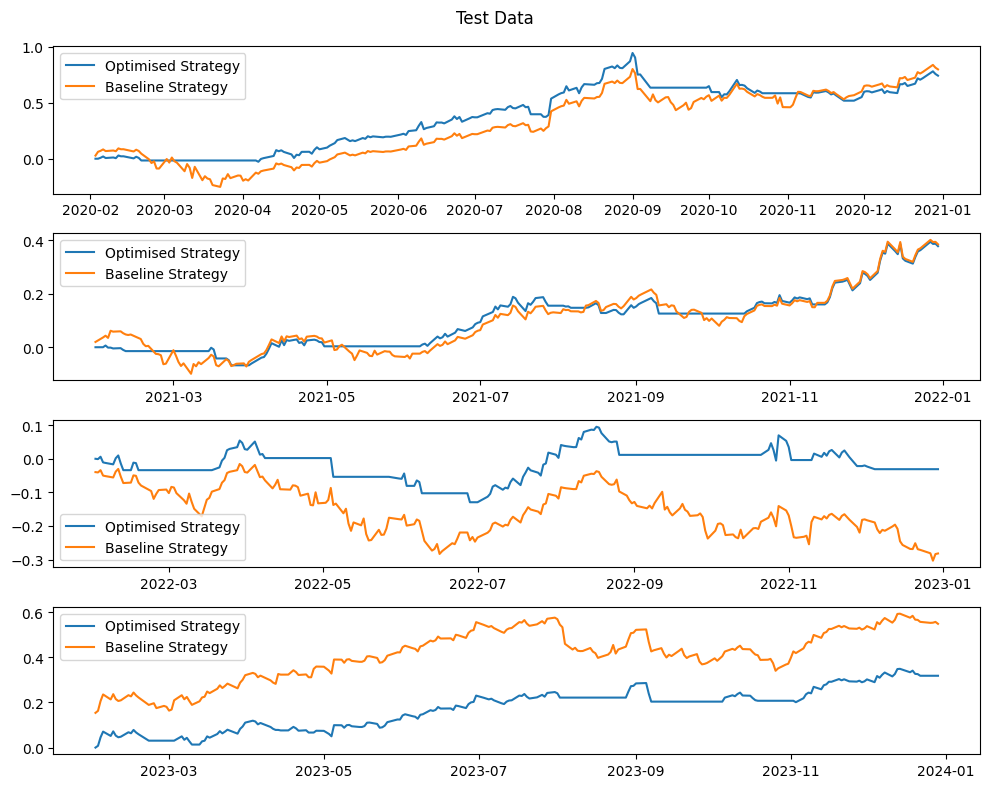

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
#  test plot 1
ax[0].plot(test_data1['Equity_Curve'])
ax[0].plot(test_data1['Equity_Curve: BASELINE'])
ax[0].legend(['Optimised Strategy', 'Baseline Strategy'])
#  test plot 2
ax[1].plot(test_data2['Equity_Curve'])
ax[1].plot(test_data2['Equity_Curve: BASELINE'])
ax[1].legend(['Optimised Strategy', 'Baseline Strategy'])
#  test plot 3
ax[2].plot(test_data3['Equity_Curve'])
ax[2].plot(test_data3['Equity_Curve: BASELINE'])
ax[2].legend(['Optimised Strategy', 'Baseline Strategy'])
#  test plot 1
ax[3].plot(test_data4['Equity_Curve'])
ax[3].plot(test_data4['Equity_Curve: BASELINE'])
ax[3].legend(['Optimised Strategy', 'Baseline Strategy'])
fig.suptitle('Test Data')
fig.tight_layout()

We can see that the strategy does better in periods where the baseline market is negatively trending, an observation consistent across both train and test sets. The strategy however fails to significantly over perform the baseline in positive momentum states. This observation is particularly interesting as the premise of a momentum strategy is to over perform the baseline except in cases where the baseline is non-trending.

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.plot(test_data1['Equity_Curve'])
plt.plot(test_data2['Equity_Curve'])
plt.plot(test_data3['Equity_Curve'])
plt.plot(test_data4['Equity_Curve'])
plt.title("Rolling WFA test data")
plt.legend(['Test 1', 'Test 2', 'Test 3', 'Test 4'])
plt.grid(True)
plt.tight_layout()

NameError: name 'plt' is not defined

Lets plot the combined equity curve and compare it to the AAPL equaity curve

In [ ]:
test_data_comb = pd.concat([test_data1['Strategy_Returns'],
                            test_data2['Strategy_Returns'],
                            test_data3['Strategy_Returns'],
                            test_data4['Strategy_Returns']])
test_data_comb = pd.DataFrame(test_data_comb)
equity = test_data_comb.apply(lambda x: (1+x).cumprod()-1, axis=0)

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


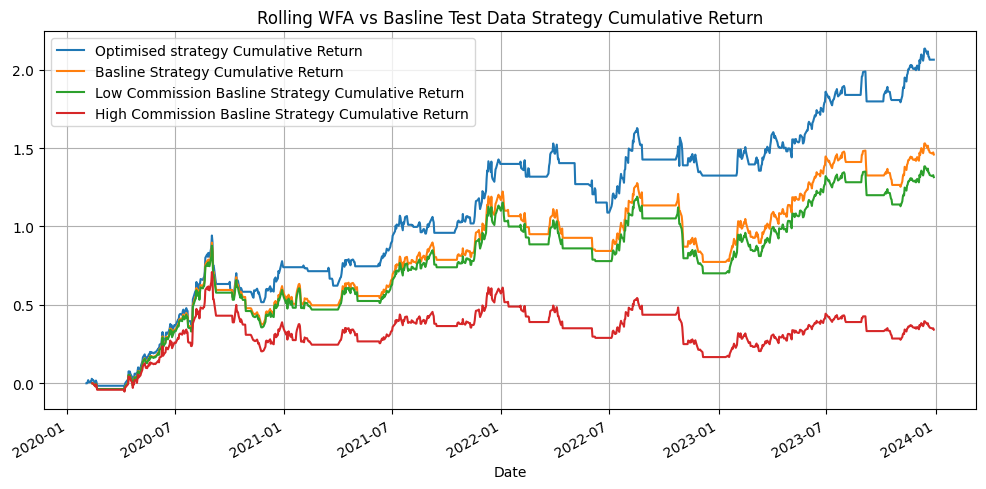

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.plot(equity, label = 'Optimised strategy Cumulative Return')
data, rorb, _, _ = kde_strategy(ticker, 30, 10, test_start1, test_end4)
data['Equity_Curve'].plot(label = 'Basline Strategy Cumulative Return')
data['Equity_Curve: Commission min'].plot(label = 'Low Commission Basline Strategy Cumulative Return')
data['Equity_Curve: Commission max'].plot(label = 'High Commission Basline Strategy Cumulative Return')
plt.title('Rolling WFA vs Basline Test Data Strategy Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()

Optimised premium

In [ ]:
prem = equity.iloc[-1] - rorb
premium = prem.astype(float).values
print("Optimisation Equity Gain (% terms) of", premium*100)

Optimisation Equity Gain (% terms) of [60.48266192]


# **Conclusion**

This notebook has presented the KDE moving average as an alternative to the moving average algorithm for momentum trading, derived the algorghim mathamtically, tested its robustness by applying grid search optimisation and combined this with a rigeress backtesting technique in WFA to access the potential improvemnets in performance we can

# **Appendix**


## 1. Integral Solution

$\int y \, k_{h_2}(y - Y_i) \, dy
$

$\text{Let} \, \, k_{h_2}(y - Y_i) = \frac{1}{h_2} K \left( \frac{y - Y_i}{h_2} \right)
$

By change of variables let $ u = \frac{y - Y_i}{h_2}$ so that $y = u h_2 + Y_i$, this implies

$\frac{dy}{du} = h_2 \Leftrightarrow dy = h_2 \, du$

\begin{align} \Rightarrow \int (u h_2 + Y_i) \left( \frac{1}{h_2} K(u) \right) h_2 \, du = h_2 \int u K(u) \, du + \int Y_i K(u) \, du
= Y_i
\end{align}

The first integral integrates an odd function over a symmetric limit $^1$ and therefore evalutes to 0. In the second integral we require that $K(u)$ is a valid density equal to 1, $Y_i$ is non dependent on $u$ and therefore this integral simplifies to $Y_i$.


---

### footnote 1

For odd function we require $f(-x) = -f(x)$. here $f(x) = (uK(u))$

\begin{align}
\Rightarrow -(-uK(-u)) = uK(-u)
\end{align}

and hece $K(u)$ is an odd function.


# **Bibliography**

[1] - [Kernel Regression Estimation](https://bookdown.org/egarpor/PM-UC3M/npreg-kre.html)